<a href="https://colab.research.google.com/github/CaLYPsO19/ImageForge/blob/main/Pyramid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **IMPORTING** **MODULES**

In [3]:
import pandas as pd ### a powerful data analysis and manipulation library for Python

import numpy as np ### Array, Linear Algebra, Random Number Generation

import matplotlib.pyplot as plt ### pyplot is mainly intended for interactive plots

import seaborn as sns ### For showing various types of plots

from sklearn.linear_model import LogisticRegression
### This class implements regularized logistic regression

import sklearn.metrics as skm
### module includes score functions, performance metrics

from sklearn.model_selection import train_test_split
### Split arrays or matrices into random train and test subsets

**READING** **CSV** **FILES**

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the data from .csv file
data = pd.read_csv('/content/drive/MyDrive/data/pyramid_scheme.csv')
data

,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,1,3500,2,21,1000,-16500
1,2,3500,2,26,1000,-21500
2,3,3500,2,23,1000,-18500
3,4,3500,3,12,1000,-4000
4,5,3500,2,12,1000,-7500
...,...,...,...,...,...,...
495,496,3500,5,12,1000,3000
496,497,3500,3,8,1000,0
497,498,3500,2,10,1000,-5500
498,499,3500,4,21,1000,-9500


**DATA** **EXPLORATION**

In [7]:
# printing the column informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        500 non-null    int64
 1   cost_price        500 non-null    int64
 2   profit_markup     500 non-null    int64
 3   depth_of_tree     500 non-null    int64
 4   sales_commission  500 non-null    int64
 5   profit            500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [8]:
# Description of overall data
data.describe()

,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
count,500.000000,500.0,500.000000,500.000000,500.0,500.000000
mean,250.500000,3500.0,3.498000,15.896000,1000.0,-6153.000000
std,144.481833,0.0,1.126292,8.095694,0.0,9080.528784
min,1.000000,3500.0,2.000000,2.000000,1000.0,-25500.000000
25%,125.750000,3500.0,3.000000,9.000000,1000.0,-12500.000000
50%,250.500000,3500.0,3.000000,16.000000,1000.0,-6500.000000
75%,375.250000,3500.0,5.000000,23.000000,1000.0,500.000000
max,500.000000,3500.0,5.000000,30.000000,1000.0,13000.000000


In [9]:
# Printing the original data
print(data.head())
# take all rows
# take all col from 1 to end
data = data.iloc[:,1:]
# Printing the new data
print(data.head())

   Unnamed: 0  cost_price  profit_markup  depth_of_tree  sales_commission  \
0           1        3500              2             21              1000   
1           2        3500              2             26              1000   
2           3        3500              2             23              1000   
3           4        3500              3             12              1000   
4           5        3500              2             12              1000   

   profit  
0  -16500  
1  -21500  
2  -18500  
3   -4000  
4   -7500  
   cost_price  profit_markup  depth_of_tree  sales_commission  profit
0        3500              2             21              1000  -16500
1        3500              2             26              1000  -21500
2        3500              2             23              1000  -18500
3        3500              3             12              1000   -4000
4        3500              2             12              1000   -7500


<Figure size 1200x600 with 0 Axes>

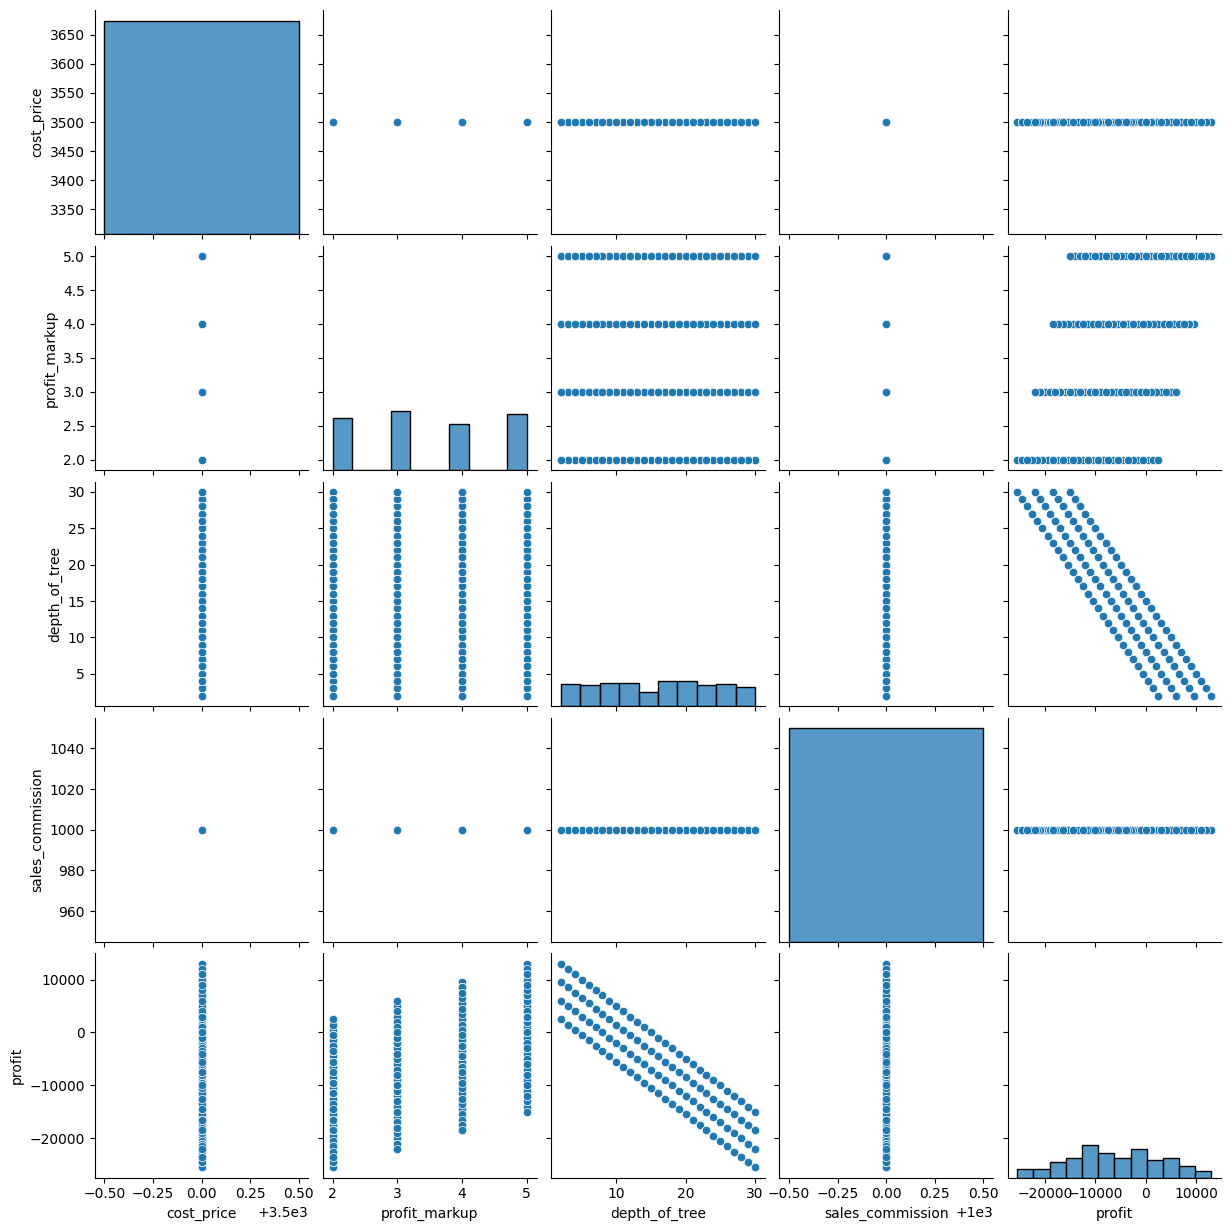

In [10]:
# Printing the pairplot graph for the data
plt.figure(figsize=(12,6))
sns.pairplot(data,kind='scatter')
plt.show()

<Axes: >

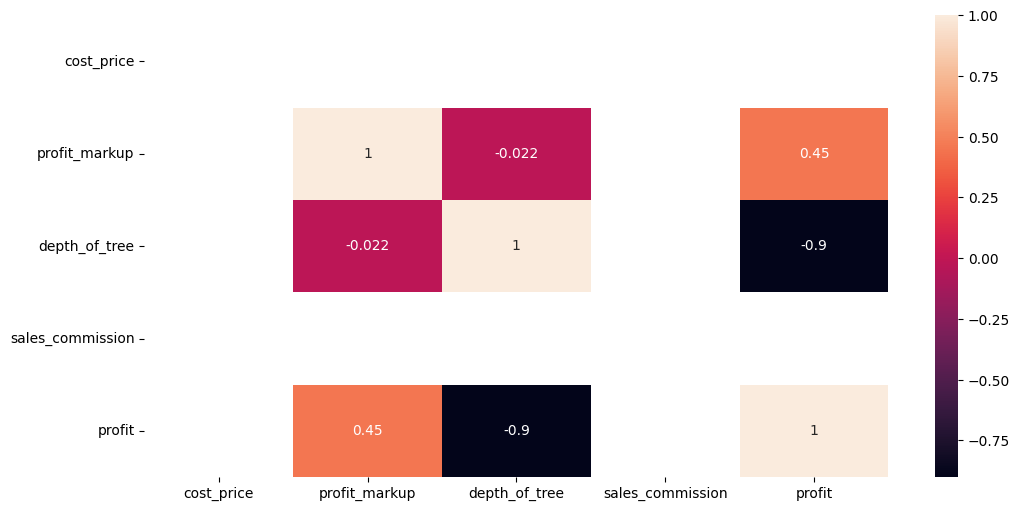

In [11]:
plt.figure(figsize=(12,6))
cor = data.corr()
# correlate all columns with each other
# +ve => directly prop
# -ve => inversely prop
sns.heatmap(cor,annot=True)

<Axes: xlabel='cost_price'>

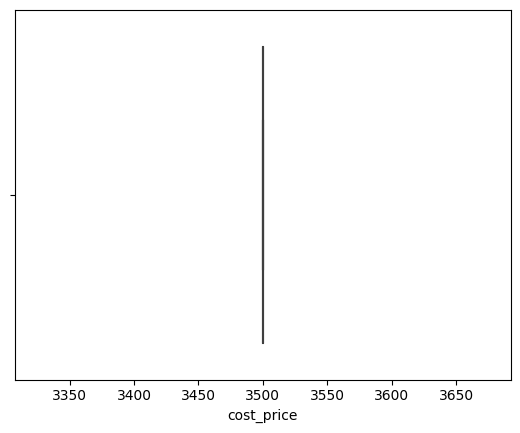

In [12]:
# Plotting boxplot for column cost_price
sns.boxplot(x = data['cost_price'])

<Axes: xlabel='profit_markup'>

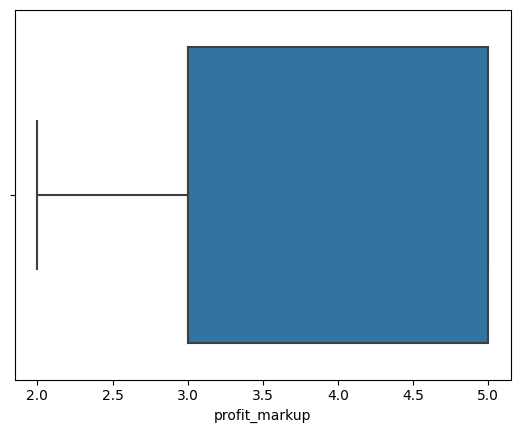

In [13]:
# Plotting boxplot for column profit_markup
sns.boxplot(x = data['profit_markup'])

<Axes: xlabel='depth_of_tree'>

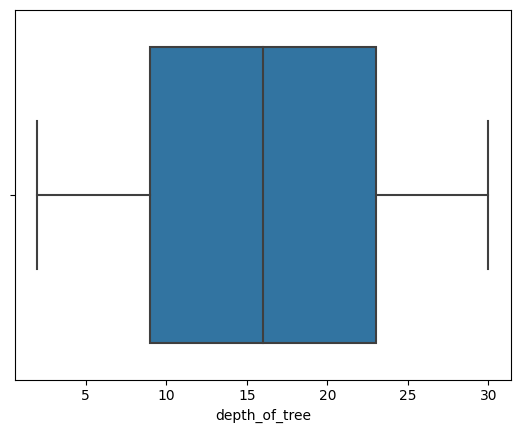

In [14]:
# Plotting boxplot for column depth_of_tree
sns.boxplot(x = data['depth_of_tree'])

<Axes: xlabel='sales_commission'>

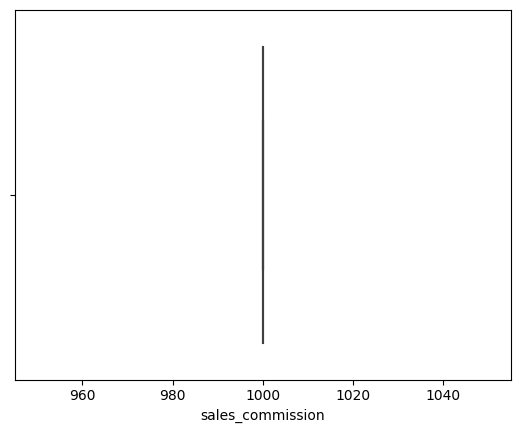

In [15]:
# Plotting boxplot for column sales_commission
sns.boxplot(x = data['sales_commission'])

<ipython-input-16-ecd435910cbc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['profit_markup'])


<Figure size 640x480 with 0 Axes>

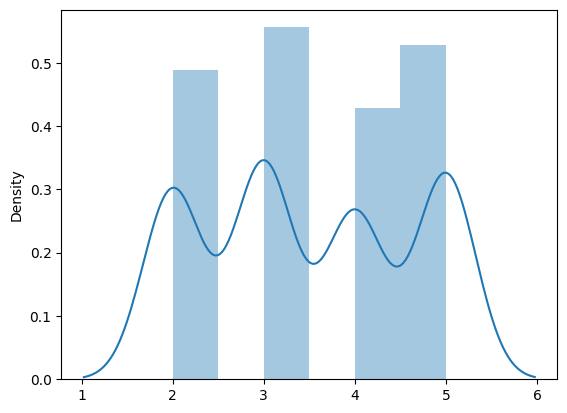

<Figure size 640x480 with 0 Axes>

In [16]:
# X['profit_markup'] shows the 'profit_markup' values
sns.distplot(x = data['profit_markup'])
plt.figure()

<ipython-input-17-0fc905c082e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['depth_of_tree'])


<Figure size 640x480 with 0 Axes>

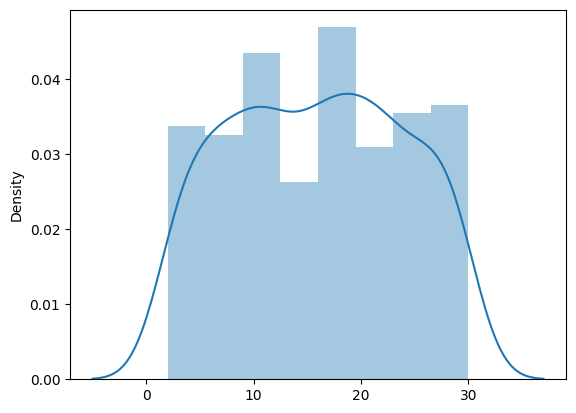

<Figure size 640x480 with 0 Axes>

In [17]:
# X['profit_markup'] shows the 'profit_markup' values
sns.distplot(x = data['depth_of_tree'])
plt.figure()

**DATA** **PREPROCESSING**

In [43]:
# 'profit_markup' directly prop to profit
# 'depth_of_tree' indeirectly prop to profit
# all other fields do not relate to profit or are constants

X = data[['profit_markup','depth_of_tree']]
X.head(5)

,profit_markup,depth_of_tree
0,2,21
1,2,26
2,2,23
3,3,12
4,2,12


In [44]:
y = data['profit']
y.head(5)

0   -16500
1   -21500
2   -18500
3    -4000
4    -7500
Name: profit, dtype: int64

In [45]:
Y = np.array([0 if i <= 0 else 1 for i in y])
# show 0 for loss and 1 for profit
# Y = TARGET DATA
# print(Y)

<Axes: ylabel='count'>

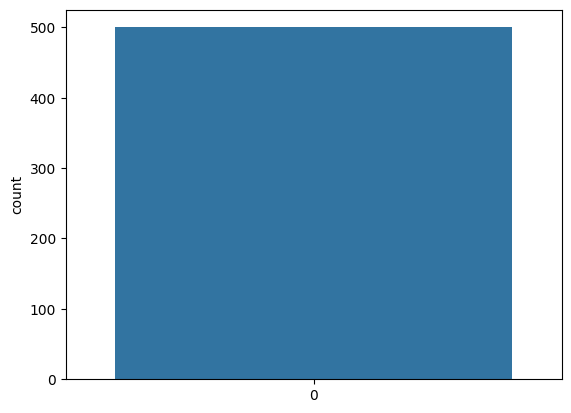

In [46]:
sns.countplot(Y)
# 0 => LOSS (loss data)
# 1 => PROFIT (profit data)

In [22]:
# splitting train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (400, 2)
X_test shape:  (100, 2)
y_train shape:  (400,)
y_test shape:  (100,)


**MODEL**

In [24]:
# WE USE LOGISTIC REGRESSION AS WE NEED TO PREDICT EITHER PROFIT OR LOSS.
# WE HAVE ONLY TWO CLASSES TO PREDICT. SO, WE USE IT AS IT IS A CLASSIFICATION PROBLEM.

In [25]:
# Calling the function LogisticRegression from sklearn.linear_model
lr = LogisticRegression(penalty = 'l2', C = 1, max_iter = 100)

In [26]:
# Fitting the normalised X_train values with y_train
lr.fit(X_train, y_train)
# lr.fit(X, Y)

LogisticRegression(C=1)

In [27]:
# Scoring the model
lr.score(X_train, y_train)
# lr.score(X, Y)

0.9875

In [28]:
# Predicting the outcome for test dataset
y_predict = lr.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

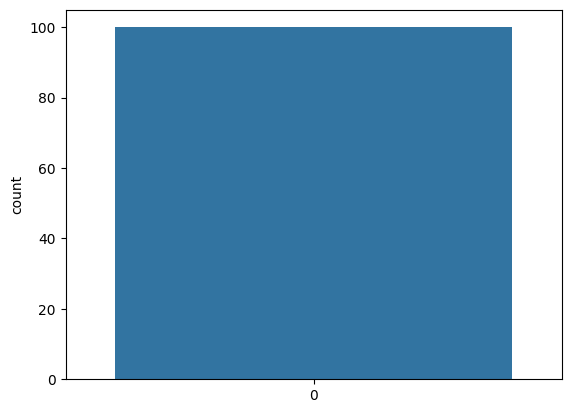

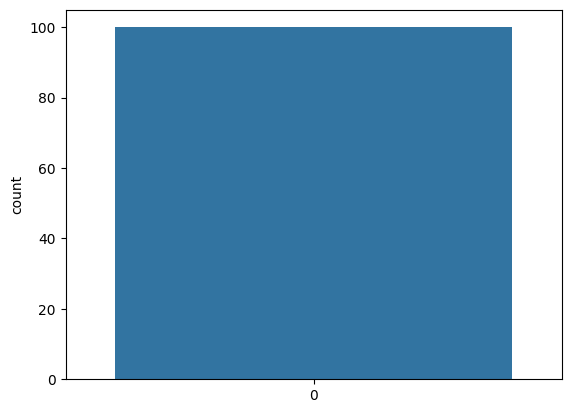

In [29]:
sns.countplot(y_test)
plt.show()
sns.countplot(y_predict)
plt.show()

**MODEL** **EVALUATION**

In [30]:
lr.score(X_test, y_predict)

1.0

In [31]:
y_pred = lr.predict(X_test)
skm.f1_score(y_test, y_pred)

0.9803921568627451

In [32]:
y_pred = lr.predict(X_test)
skm.fbeta_score(y_test, y_pred, beta = 0.5)

0.9920634920634919

In [33]:
y_pred = lr.predict(X_test)
skm.log_loss(y_test, y_pred, eps = 1e-15)

0.34538776394910775